 # Wine Quality Prediction

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
wine_df = pd.read_csv(r'Wine Classification Dataset.csv')

In [25]:
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [26]:
# checking for missing values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

# Data Analysis and Visulaization

In [27]:
# statistical measures of the dataset
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


# number of values for each quality


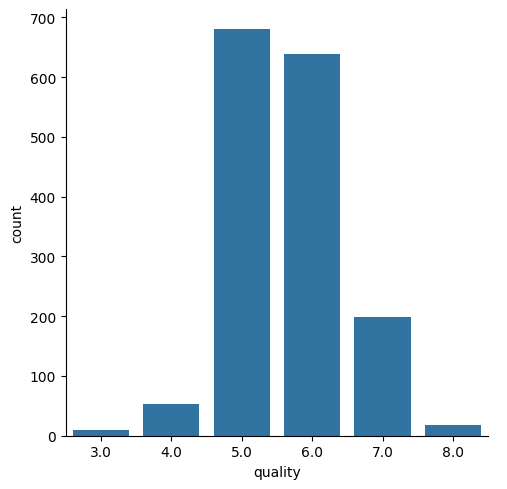

In [28]:
sns.catplot(x='quality',data=wine_df,kind='count')

# volatile acidity vs Quality


<Axes: xlabel='quality', ylabel='volatile acidity'>

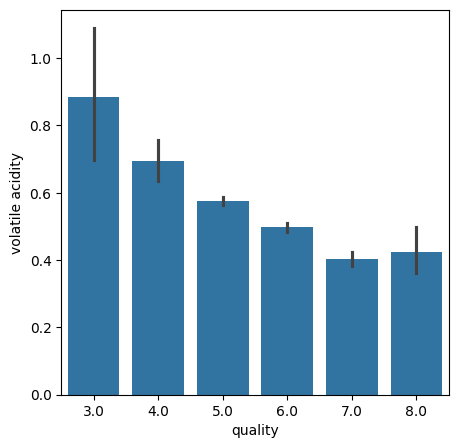

In [29]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_df)

# citric acid vs Quality

<Axes: xlabel='quality', ylabel='citric acid'>

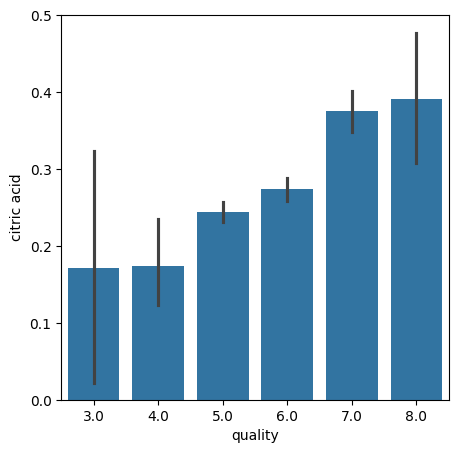

In [30]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_df)

In [31]:
correlation = wine_df.corr()

# constructing a heatmap to understand the correlation between the columns



<Axes: >

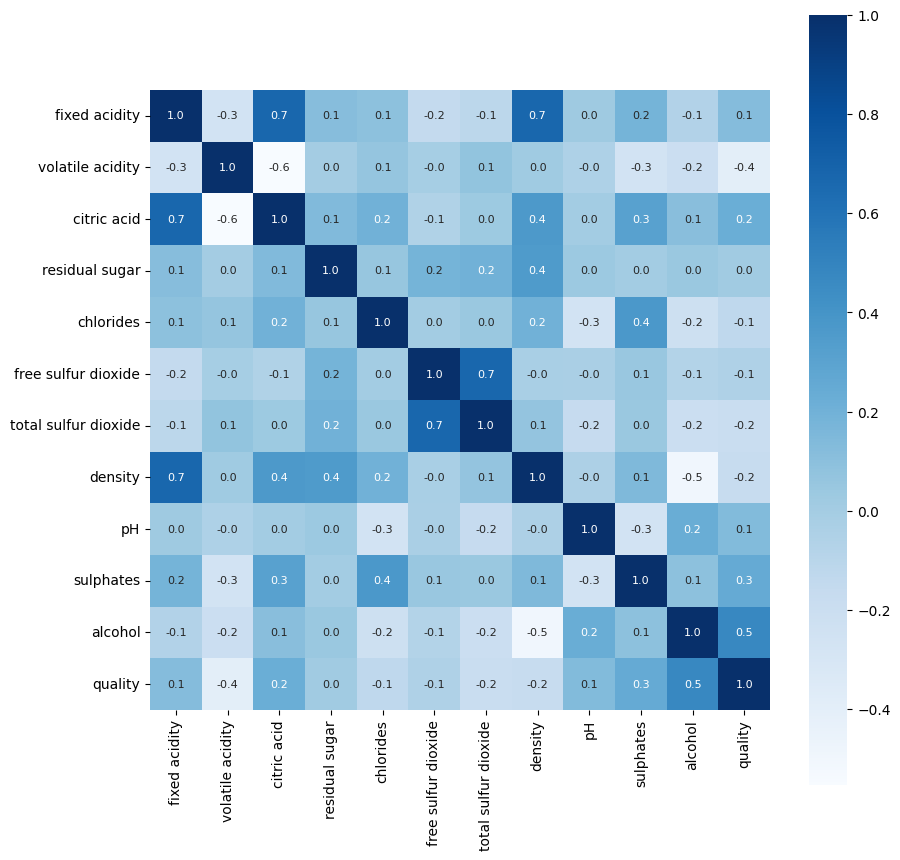

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,square=True,fmt=".1f",annot_kws={"size":8},cmap='Blues')

# separate the data and Label

In [33]:
X = wine_df.drop('quality',axis=1)

In [34]:
y = wine_df['quality'].apply(lambda yval:1 if yval>=7 else 0)

In [35]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

# Train & Test Split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [37]:
print(y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# Model Training:

# Random Forest Classifier

In [42]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation

Accuracy Score

In [39]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print(accuracy_score(X_test_prediction, Y_test))

0.925


# Building a Predictive System

In [40]:
input_data = (6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6)
np_input_data = np.asarray(input_data)
reshaped_data = np_input_data.reshape(1,-1)
predict = model.predict(reshaped_data)

if predict[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine


c:\Users\shivani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
wine_df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1390,6.0,0.490,0.00,2.3,0.068,15.0,33.0,0.99292,3.52,0.59,12.50,6.0
1420,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.52,0.46,9.80,5.0
1313,7.0,0.360,0.21,2.3,0.086,20.0,65.0,0.99558,3.52,0.54,10.10,6.0
862,7.5,0.420,0.32,2.7,0.067,7.0,25.0,0.99628,3.52,0.44,10.40,5.0
124,7.8,0.500,0.17,1.6,0.082,21.0,102.0,0.99600,3.39,0.48,9.50,5.0
1022,7.0,0.510,0.09,2.1,0.062,4.0,9.0,0.99584,3.52,0.54,10.50,5.0
435,12.3,0.390,0.63,2.3,0.091,6.0,18.0,1.00040,3.52,0.49,9.50,5.0
156,7.1,0.430,0.42,5.5,0.070,29.0,129.0,0.99730,3.42,0.72,10.50,5.0
1492,6.2,0.650,0.06,1.6,0.050,6.0,18.0,0.99348,3.52,0.54,11.95,5.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.00,6.0
